# Анализ продаж аптечной сети

### ABC-анализ, XYZ-анализ, Анализ динамики продаж

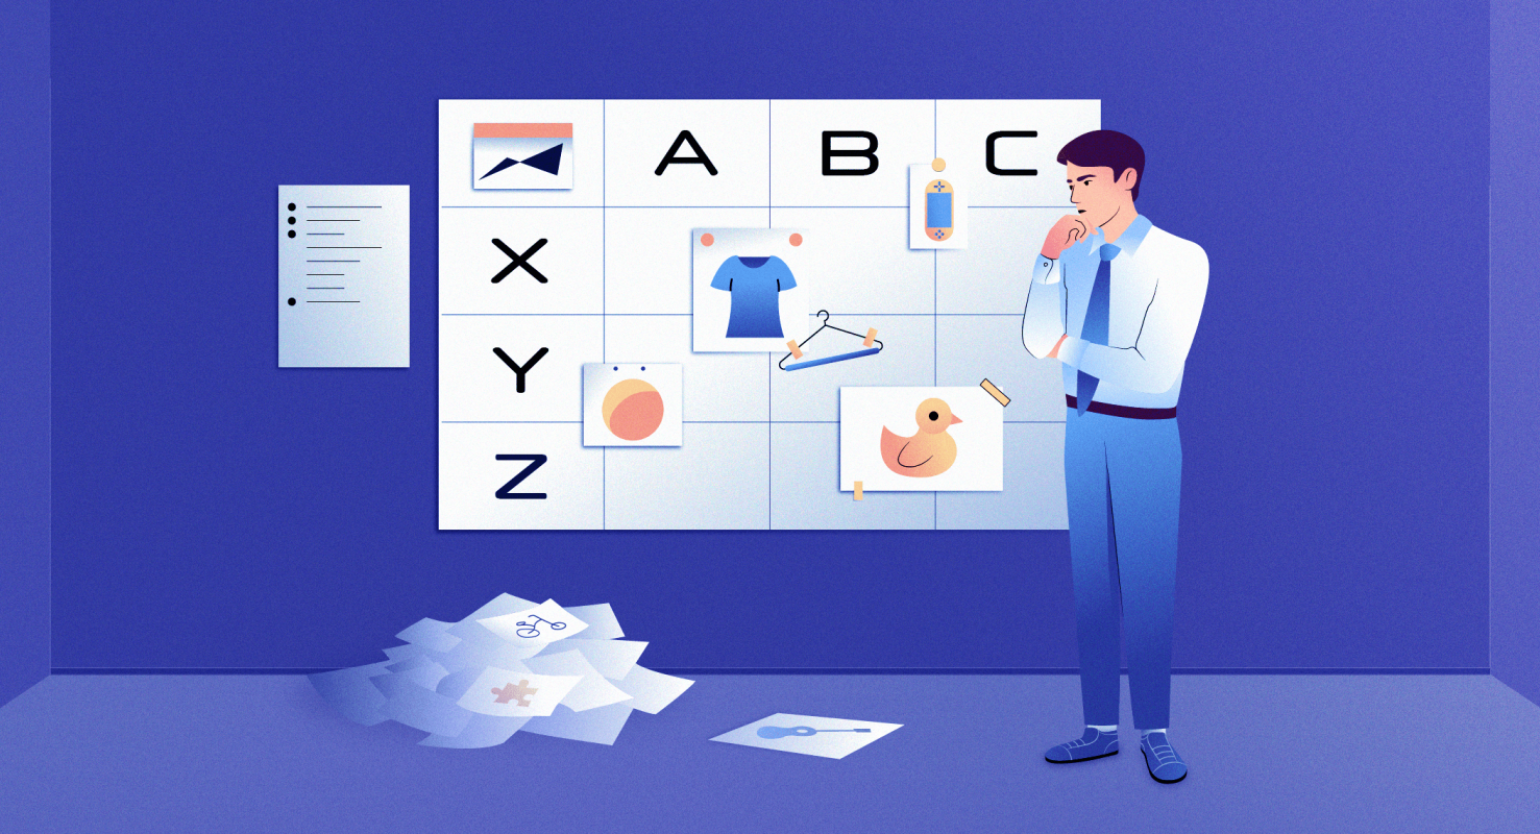

Данные о продажах находятся в одной таблице со следующими признаками:

**Обозначение признаков**

- DR_Dat - Дата продажи или транзакции.
- DR_Tim - Время продажи или транзакции.
- DR_NChk - Номер чека.
- DR_Apt - Аптека
- DR_Kkm - Идентификатор кассового аппарата
- DR_TDoc - Тип продажи
- DR_TPay - Тип оплаты (наличные, карта и т.д.).
- DR_CDrugs - id лекарства
- DR_NDrugs - Наименование лекарства.
- DR_Suppl - Поставщик.
- DR_Prod - Производитель.
- DR_Kol - Количество.
- DR_CZak - Закупочная цена.
- DR_CRoz - Розничная цена.
- DR_SDisc - Сумма скидки.
- DR_CDisc - id скидки.
- DR_BCDisc - Штрих-код скидки
- DR_TabEmpl - Сотрудник, который совершил продажу.
- DR_VZak - Тип заказа.
- DR_Pos - Позиция (номер позиции в чеке).

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
pd.set_option('display.max_columns', 40)
pd.set_option('display.float_format', '{:.3f}'.format)

In [4]:
df = pd.read_csv('data.csv', encoding='1251')

In [5]:
df.head(5)

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,DR_Suppl,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
0,2022-08-11,10:15:35,2173,2004598,2,22577,Розничная реализация,18,45399,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,Катрен г.Химки,Д-р Редди с Лабораторис Лтд / Dr.REDDY's,1.000,41.080,51.000,12.000,925.000,200000000492.000,205,1,1.000
1,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,261519,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,Катрен г.Химки,ФЛОРА КАВКАЗА ОАО,1.000,18.610,31.000,3.000,9.000,200010010204.000,205,1,1.000
2,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,460864,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,Катрен г.Химки,КОРОЛЕВФАРМ ООО,1.000,132.690,209.000,20.000,9.000,200010010204.000,205,1,2.000
3,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,172823,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,Катрен г.Химки,КОРОЛЕВФАРМ ООО,1.000,133.650,210.000,21.000,9.000,200010010204.000,205,1,3.000
4,2022-08-11,10:33:56,2175,2004598,2,22577,Розничная реализация,18,79056,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,Катрен г.Химки,Новартис Фарма АГ,1.000,709.950,787.000,49.000,925.000,200000000492.000,205,1,1.000


In [6]:
df.shape

(4462, 21)

In [7]:
df.dtypes

DR_Dat         object
DR_Tim         object
DR_NChk         int64
DR_NDoc         int64
DR_Apt          int64
DR_Kkm          int64
DR_TDoc        object
DR_TPay         int64
DR_CDrugs       int64
DR_NDrugs      object
DR_Suppl       object
DR_Prod        object
DR_Kol        float64
DR_CZak       float64
DR_CRoz       float64
DR_SDisc      float64
DR_CDisc      float64
DR_BCDisc     float64
DR_TabEmpl      int64
DR_VZak         int64
DR_Pos        float64
dtype: object

## Подготовка данных

**Отбор стобцов и переименование**

In [8]:
df.columns

Index(['DR_Dat', 'DR_Tim', 'DR_NChk', 'DR_NDoc', 'DR_Apt', 'DR_Kkm', 'DR_TDoc',
       'DR_TPay', 'DR_CDrugs', 'DR_NDrugs', 'DR_Suppl', 'DR_Prod', 'DR_Kol',
       'DR_CZak', 'DR_CRoz', 'DR_SDisc', 'DR_CDisc', 'DR_BCDisc', 'DR_TabEmpl',
       'DR_VZak', 'DR_Pos'],
      dtype='object')

In [9]:
cols = ['DR_Dat', 'DR_Tim', 'DR_NChk', 'DR_NDoc', 'DR_Apt', 'DR_TPay', 'DR_CDrugs', 'DR_NDrugs', 'DR_Suppl', 'DR_Kol',
       'DR_CZak', 'DR_CRoz', 'DR_SDisc', 'DR_CDisc', 'DR_BCDisc', 'DR_TabEmpl',
       'DR_VZak', 'DR_Pos']

In [10]:
df = df[cols]

In [11]:
df.shape

(4462, 18)

In [12]:
df.columns = ['date', 'time', 'ncheque', 'ndoc', 'id_apt', 'pay_type', 'drug_id', 'drug', 'supplier', 'quantity', 'purchase_price', 'retail_price', 'discount', 'disc_id', 'disc_barcode', 'empl_id', 'order_type', 'position']

In [13]:
df['disc_barcode'] = df['disc_barcode'].astype('str').replace('\.0', '', regex=True)

In [14]:
df.head(3)

,date,time,ncheque,ndoc,id_apt,pay_type,drug_id,drug,supplier,quantity,purchase_price,retail_price,discount,disc_id,disc_barcode,empl_id,order_type,position
0,2022-08-11,10:15:35,2173,2004598,2,18,45399,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,Катрен г.Химки,1.000,41.080,51.000,12.000,925.000,200000000492,205,1,1.000
1,2022-08-11,10:27:46,2174,2004598,2,15,261519,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,Катрен г.Химки,1.000,18.610,31.000,3.000,9.000,200010010204,205,1,1.000
2,2022-08-11,10:27:46,2174,2004598,2,15,460864,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,Катрен г.Химки,1.000,132.690,209.000,20.000,9.000,200010010204,205,1,2.000


**Редактирование данных в признаках**

In [15]:
df['disc_id'] = df['disc_id'].astype('str').replace('\.0', '', regex=True)

In [16]:
df['date'] = pd.to_datetime(df['date']).dt.strftime('%d.%m.%Y')

In [17]:
df['order_type'] = df['order_type'].astype('str').replace('1', 'Обычный').replace('2', 'Интернет')

## EDA

**Проверка пропущенных значений**

In [18]:
df.isna().sum()

date              0
time              0
ncheque           0
ndoc              0
id_apt            0
pay_type          0
drug_id           0
drug              0
supplier          0
quantity          0
purchase_price    0
retail_price      0
discount          0
disc_id           0
disc_barcode      0
empl_id           0
order_type        0
position          0
dtype: int64

**Описательная статистика**

In [19]:
df.describe()

,ncheque,ndoc,id_apt,pay_type,drug_id,quantity,purchase_price,retail_price,discount,empl_id,position
count,4462.000,4462.000,4462.000,4462.000,4462.000,4462.000,4462.000,4462.000,4462.000,4462.000,4462.000
mean,4903.135,10842995.329,10.839,16.896,259227.092,1.028,241.639,306.049,10.561,91.738,2.681
std,1839.700,6107181.405,6.108,1.447,299073.896,0.538,454.558,532.173,31.368,108.082,2.749
min,1698.000,2004595.000,2.000,15.000,3.000,0.007,0.010,0.010,0.000,25.000,1.000
25%,4187.000,6003620.000,6.000,15.000,29060.000,1.000,36.645,52.000,0.000,37.000,1.000
50%,4877.500,11007039.000,11.000,18.000,187304.000,1.000,103.785,137.000,0.000,53.000,2.000
75%,5472.750,18002536.000,18.000,18.000,377589.000,1.000,299.060,391.750,7.000,123.000,3.000
max,8490.000,18002543.000,18.000,18.000,1504498.000,20.000,11851.130,12345.000,650.000,605.000,24.000


**Анализ**

_Распределение покупок по способу оплаты_

In [20]:
df['pay_type'].value_counts()

pay_type
18    2820
15    1642
Name: count, dtype: int64

_Распределение количества позиций в чеке_ (как минимум "столько" позиций есть в чеке)

In [21]:
df['position'].value_counts()

position
1.000     2019
2.000      971
3.000      528
4.000      301
5.000      178
6.000      117
7.000       76
8.000       56
9.000       42
10.000      37
11.000      30
12.000      25
13.000      21
14.000      17
15.000      14
16.000       9
17.000       7
18.000       4
19.000       3
20.000       2
21.000       2
23.000       1
24.000       1
22.000       1
Name: count, dtype: int64

<Axes: >

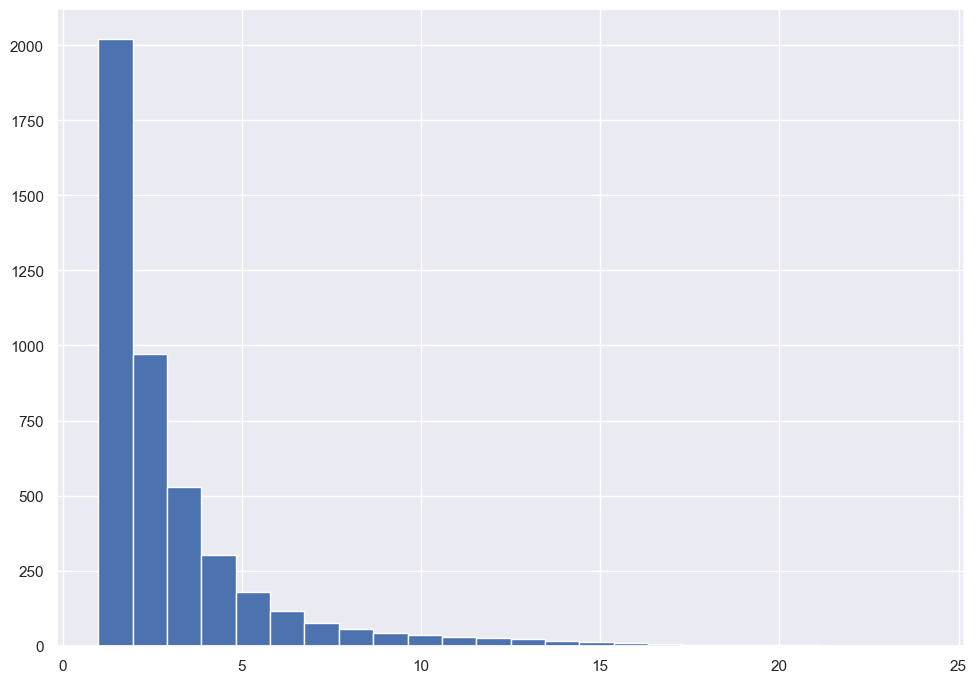

In [22]:
df.position.hist(bins=24)

_Матрица корреляции числовых признаков_

<Axes: >

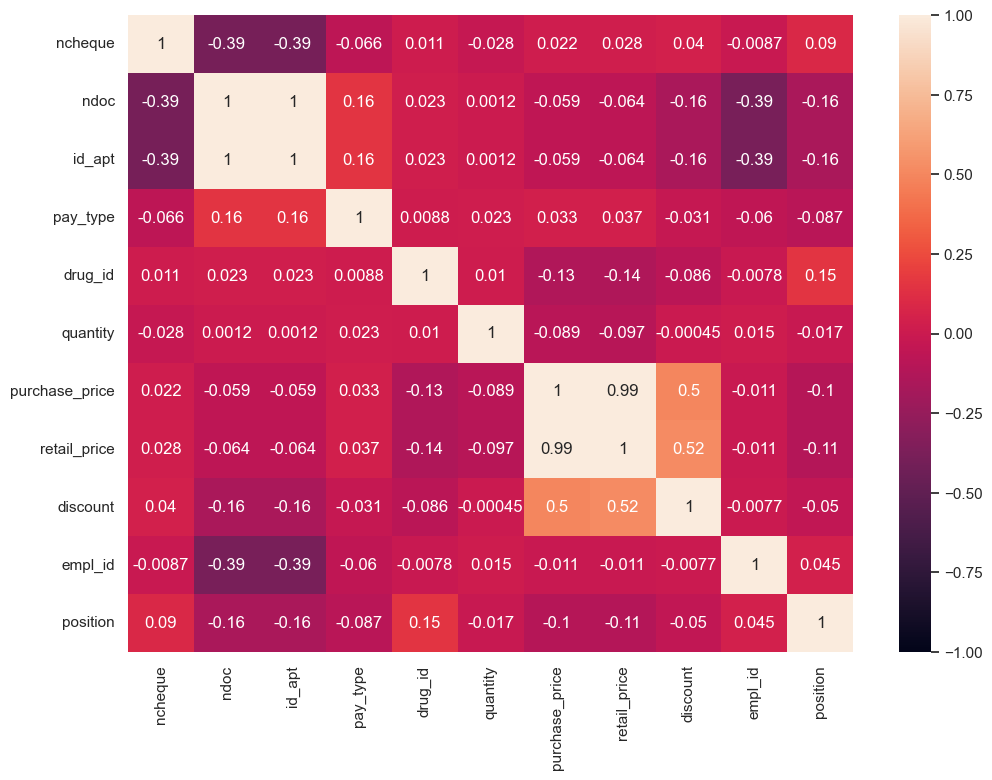

In [23]:
sns.heatmap(df.corr(numeric_only = True), vmax=1, vmin=-1, annot=True)

_Распределение количества проданных товаров по часам_

In [24]:
df['hour'] = pd.to_datetime(df.time).dt.hour

In [25]:
gr = df.groupby(['hour'])['quantity'].agg(sum).reset_index()
gr

,hour,quantity
0,8,20.100
1,9,236.500
2,10,361.649
3,11,326.545
4,12,311.587
5,13,422.796
6,14,358.296
7,15,432.973
8,16,375.875
9,17,375.450


<Axes: >

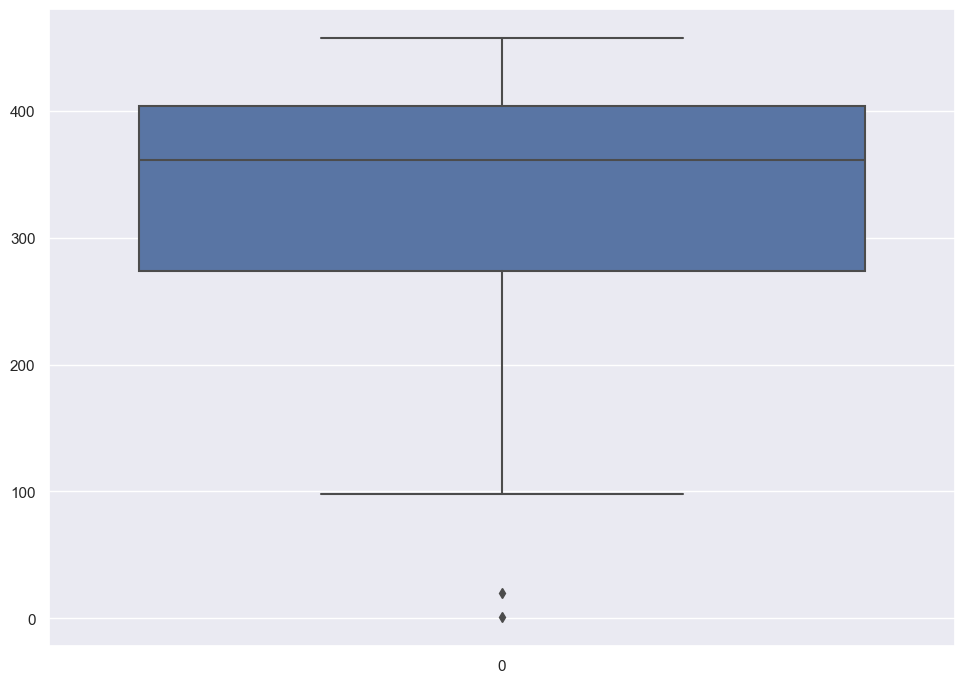

In [26]:
sns.boxplot(gr.quantity)

Наиболее значимо отклоняется количество проданных товаров с 8 до 9 часов утра и с 22 до 23 часов вечера. 

_Количество проданных товаров, суммарная и максимальная сумма продажи и сумма потраченная на закуку этих товаров у поставщика по каждому чеку_

In [27]:
info_sales_cheque = df.groupby(['date', 'ncheque']).aggregate({'quantity': 'sum',
                                     'retail_price': ['sum', 'max'],
                                     'purchase_price': 'sum'}).reset_index()

In [28]:
info_sales_cheque.sort_values(by=('retail_price', 'sum'), ascending=False)

date ncheque quantity retail_price           purchase_price
                              sum          sum       max            sum
1304  12.08.2022    4422    3.000    14609.010 10187.000      12485.260
1904  12.08.2022    8454    2.000    14395.000 12329.000      13055.720
114   11.08.2022    2192    1.000    12345.000 12345.000      11851.130
215   11.08.2022    2488    8.000     8303.000  2532.000       7070.410
639   11.08.2022    4740    3.000     7866.000  3763.000       7624.020
...          ...     ...      ...          ...       ...            ...
571   11.08.2022    4672   21.000       10.000     8.000          6.890
1533  12.08.2022    5201    2.000        7.000     7.000          3.730
1529  12.08.2022    5038    4.000        4.000     4.000          1.980
1707  12.08.2022    5571    1.000        2.000     2.000          1.150
1560  12.08.2022    5228    1.000        2.000     2.000          1.150

[1941 rows x 6 columns]

_Сумма валовой прибыли по дате и сотрудникам_

In [29]:
df.groupby(['date', 'empl_id'])[['retail_price', 'purchase_price', 'quantity']].apply(lambda x: sum(x['quantity']*(x['retail_price'] - x['purchase_price'])))

date        empl_id
11.08.2022  25        20642.289
            30        20328.671
            36        14090.042
            47        16983.789
            50        17384.405
            53        10056.398
            54        13981.467
            123       23756.339
            205        9724.191
            605        8341.706
12.08.2022  37        22613.803
            48        19244.818
            54        16801.828
            110       22711.324
            123       23167.405
            205        8873.304
dtype: float64

_Округление цен до сотен и подсчет количества проданных товаров в данной ценовой категории_

In [30]:
df['retail_price_2'] = df.retail_price.apply(lambda x: round(x, -2))
df.retail_price_2

0      100.000
1        0.000
2      200.000
3      200.000
4      800.000
         ...  
4457   100.000
4458   100.000
4459   400.000
4460   400.000
4461   300.000
Name: retail_price_2, Length: 4462, dtype: float64

In [31]:
quantity_retail = df.groupby(['date', 'retail_price_2']).aggregate({'quantity': 'sum'}).reset_index()
quantity_retail

,date,retail_price_2,quantity
0,11.08.2022,0.000,770.000
1,11.08.2022,100.000,742.000
2,11.08.2022,200.000,328.425
3,11.08.2022,300.000,196.200
4,11.08.2022,400.000,133.000
...,...,...,...
68,12.08.2022,4400.000,1.000
69,12.08.2022,5000.000,1.000
70,12.08.2022,5800.000,1.000
71,12.08.2022,10200.000,1.000


<Axes: xlabel='retail_price_2', ylabel='quantity'>

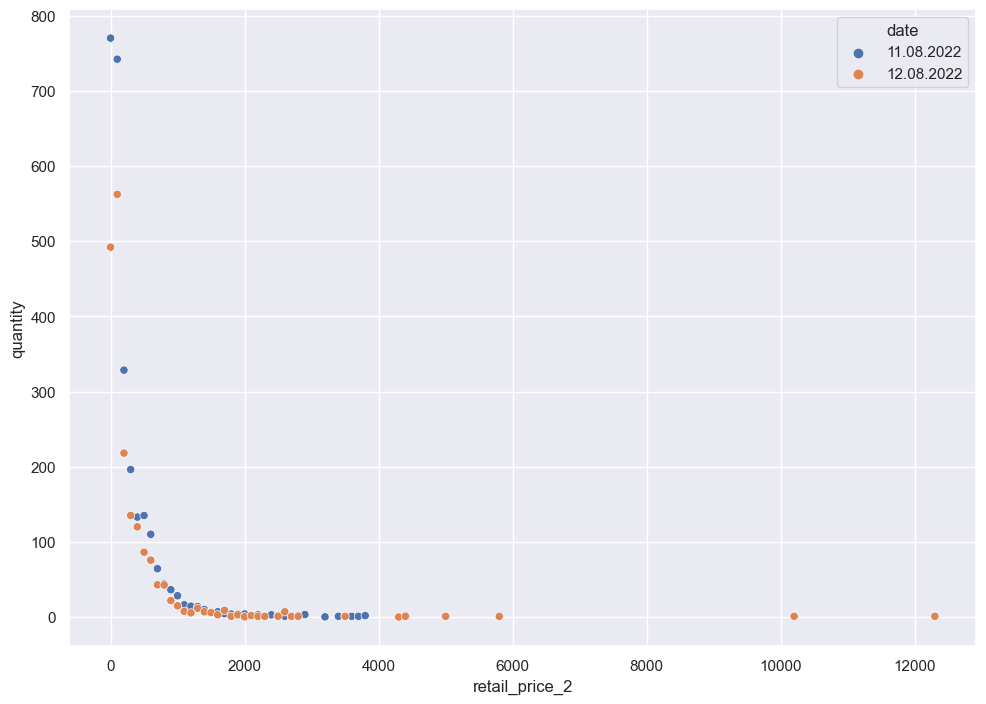

In [32]:
sns.scatterplot(x=quantity_retail.retail_price_2, y=quantity_retail.quantity, hue=quantity_retail.date)

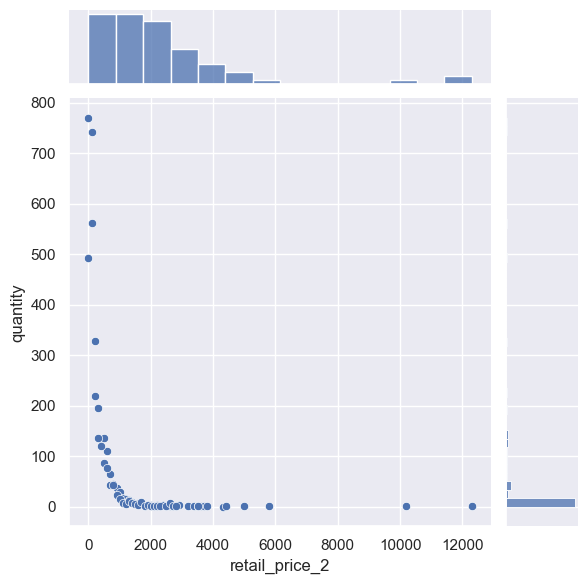

In [33]:
sns.jointplot(x=quantity_retail.retail_price_2, y=quantity_retail.quantity)

Больше всего продано товаров стоимостью до 300 рублей

_Количество проданных товаров различным способом оплаты в разрезе аптек и сотрудников_

In [34]:
quantity_pay_type = df.groupby(['date', 'id_apt', 'empl_id', 'pay_type'])['quantity'].agg('sum').reset_index()
quantity_pay_type

,date,id_apt,empl_id,pay_type,quantity
0,11.08.2022,2,123,15,151.052
1,11.08.2022,2,123,18,164.134
2,11.08.2022,2,205,15,65.107
3,11.08.2022,2,205,18,66.000
4,11.08.2022,6,25,15,95.000
5,11.08.2022,6,25,18,142.534
6,11.08.2022,7,605,15,67.040
7,11.08.2022,7,605,18,101.850
8,11.08.2022,11,30,15,179.000
9,11.08.2022,11,30,18,310.480


In [35]:
quantity_pay_type.pivot_table(index = ['date', 'id_apt', 'empl_id'], columns='pay_type', values='quantity')

pay_type                       15      18
date       id_apt empl_id                
11.08.2022 2      123     151.052 164.134
                  205      65.107  66.000
           6      25       95.000 142.534
           7      605      67.040 101.850
           11     30      179.000 310.480
           13     50      180.400 151.783
           15     53       51.980 142.100
           17     36       54.733 186.945
           18     47       89.040 236.237
                  54       65.100 198.766
12.08.2022 2      123     210.496 152.716
                  205      88.415  80.185
           6      37       72.924 207.888
           11     110      91.671 363.076
           18     48      134.793 222.651
                  54       64.100 197.646

## ABC - анализ

**ABC-анализ** — это способ классификации ресурсов по степени их влияния на прибыль компании.

Чаще всего метод ABC применяют к товарному ассортименту, чтобы понять рентабельность групп товаров или отдельных наименований и скорректировать ассортимент. Поэтому дальше мы будем рассказывать о методе именно в контексте анализа товаров.

В основе метода лежит принцип Парето: 20% усилий обеспечивают 80% результата. Применительно к товарному ассортименту его можно сформулировать так: 20% товаров делают 80% оборота компании.

Суть метода в том, чтобы отранжировать позиции с точки зрения вклада в общую прибыльность. Все товары в результате делят на три группы:

- Группа А — наиболее ценные позиции. Эти товары составляют 20% от общего ассортимента и обеспечивают 80% продаж.
- Группа В — промежуточные позиции. Составляют 30% ассортимента и делают 15% продаж.
- Группа С — наименее ценные. Эти товары составляют 50-60% ассортимента и дают 5% продаж.

Соответственно, товары группы А продавать выгодно и на их реализации стоит сконцентрироваться, а товары из группы С приносят минимум прибыли — их количество можно смело уменьшать или вовсе выводить из ассортимента.

In [36]:
df['gross_profit'] = df['quantity']*(df['retail_price'] - df['purchase_price'])

### ABC - анализ для объема продаж

In [37]:
df.head(5)

,date,time,ncheque,ndoc,id_apt,pay_type,drug_id,drug,supplier,quantity,purchase_price,retail_price,discount,disc_id,disc_barcode,empl_id,order_type,position,hour,retail_price_2,gross_profit
0,11.08.2022,10:15:35,2173,2004598,2,18,45399,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,Катрен г.Химки,1.000,41.080,51.000,12.000,925,200000000492,205,Обычный,1.000,10,100.000,9.920
1,11.08.2022,10:27:46,2174,2004598,2,15,261519,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,Катрен г.Химки,1.000,18.610,31.000,3.000,9,200010010204,205,Обычный,1.000,10,0.000,12.390
2,11.08.2022,10:27:46,2174,2004598,2,15,460864,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,Катрен г.Химки,1.000,132.690,209.000,20.000,9,200010010204,205,Обычный,2.000,10,200.000,76.310
3,11.08.2022,10:27:46,2174,2004598,2,15,172823,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,Катрен г.Химки,1.000,133.650,210.000,21.000,9,200010010204,205,Обычный,3.000,10,200.000,76.350
4,11.08.2022,10:33:56,2175,2004598,2,18,79056,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,Катрен г.Химки,1.000,709.950,787.000,49.000,925,200000000492,205,Обычный,1.000,10,800.000,77.050


In [38]:
groupped_df = df.groupby('drug').agg({'quantity': sum, 'gross_profit': sum})
groupped_df

,quantity,gross_profit
drug,,
7 СЕМЬ ДНЕЙ МАСКА Д/ЛИЦА СУББОТА РОМАНТ. ПЕРЕД СВИДАНИЕМ КРАСН.АПЕЛЬС.+ПАПАЙЯ 28МЛ. №1 [7 DAYS VILEN,1.000,31.920
"9 МЕСЯЦЕВ ФОЛИЕВАЯ К-ТА 0,4МГ. №30 ТАБ. П/П/О /ВАЛЕНТА/",1.000,26.150
911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ ОКОПНИК 100МЛ. ТУБА,2.000,76.800
911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ САБЕЛЬНИК 100МЛ.,2.000,77.750
911-ГЕЛЬ-БАЛЬЗАМ Д/ТЕЛА БИШОФИТ П/БОЛИ В СУСТАВАХ И МЫШЦАХ 100МЛ.,1.000,34.800
...,...,...
Я САМАЯ ВАТНЫЕ ПАЛОЧКИ №100 СТАКАН,1.000,25.420
ЯНТАРНАЯ К-ТА 100МГ. №10 ТАБ. (БАД) /МАРБИОФАРМ/,2.000,20.720
ЯНТАРНАЯ К-ТА ПРЕМИУМ 100МГ. №20 ТАБ. (БАД) /БАРНАУЛЬСКИЙ ЗМП/,1.000,22.200


In [39]:
groupped_df['part_of_quantity'] = (groupped_df['quantity'] / sum(groupped_df['quantity']))
groupped_df

,quantity,gross_profit,part_of_quantity
drug,,,
7 СЕМЬ ДНЕЙ МАСКА Д/ЛИЦА СУББОТА РОМАНТ. ПЕРЕД СВИДАНИЕМ КРАСН.АПЕЛЬС.+ПАПАЙЯ 28МЛ. №1 [7 DAYS VILEN,1.000,31.920,0.000
"9 МЕСЯЦЕВ ФОЛИЕВАЯ К-ТА 0,4МГ. №30 ТАБ. П/П/О /ВАЛЕНТА/",1.000,26.150,0.000
911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ ОКОПНИК 100МЛ. ТУБА,2.000,76.800,0.000
911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ САБЕЛЬНИК 100МЛ.,2.000,77.750,0.000
911-ГЕЛЬ-БАЛЬЗАМ Д/ТЕЛА БИШОФИТ П/БОЛИ В СУСТАВАХ И МЫШЦАХ 100МЛ.,1.000,34.800,0.000
...,...,...,...
Я САМАЯ ВАТНЫЕ ПАЛОЧКИ №100 СТАКАН,1.000,25.420,0.000
ЯНТАРНАЯ К-ТА 100МГ. №10 ТАБ. (БАД) /МАРБИОФАРМ/,2.000,20.720,0.000
ЯНТАРНАЯ К-ТА ПРЕМИУМ 100МГ. №20 ТАБ. (БАД) /БАРНАУЛЬСКИЙ ЗМП/,1.000,22.200,0.000


In [40]:
groupped_df = groupped_df.sort_values('part_of_quantity', ascending=False)

In [41]:
groupped_df['cumsum_part_of_quantity'] = groupped_df['part_of_quantity'].cumsum()
groupped_df

,quantity,gross_profit,part_of_quantity,cumsum_part_of_quantity
drug,,,,
ПАКЕТ,126.000,107.100,0.027,0.027
"ЦЕФТРИАКСОН 1Г. №1 ПОР. Д/Р-РА Д/В/В,В/М ФЛ. /ЛЕККО/",60.000,418.800,0.013,0.041
"НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /ЛЕККО/",48.000,261.070,0.010,0.051
"ЛЕЙКОПЛАСТЫРЬ БАКТЕР. 2,5Х7,2 №1 /ВЕРОФАРМ/",40.000,80.800,0.009,0.060
"СНУП 0,1% 90МКГ/ДОЗА 15МЛ. НАЗАЛ.СПРЕЙ ФЛ. /ШТАДА/",35.000,608.410,0.008,0.067
...,...,...,...,...
"НАТРИЯ ХЛОРИД 0,9% 400МЛ. №16 Р-Р Д/ИНФ. КОНТ. /МОСФАРМ/",0.062,3.978,0.000,1.000
"СФМ ШПРИЦ 2МЛ. 3-Х КОМП. 0,63Х32ММ 23G №100 [SFM]",0.050,13.611,0.000,1.000
ДЕРМАГРИП ХАЙ РИСК ПЕРЧАТКИ ЛАТ. СМОТР. Н/СТЕР. Н/ОПУДР Р.L №50 (25ПАР),0.040,22.862,0.000,1.000


In [42]:
groupped_df['abc_quantity'] = np.where(groupped_df['cumsum_part_of_quantity'] < 0.8, 'A', np.where(groupped_df['cumsum_part_of_quantity'] < 0.95, 'B', 'C'))
groupped_df

,quantity,gross_profit,part_of_quantity,cumsum_part_of_quantity,abc_quantity
drug,,,,,
ПАКЕТ,126.000,107.100,0.027,0.027,A
"ЦЕФТРИАКСОН 1Г. №1 ПОР. Д/Р-РА Д/В/В,В/М ФЛ. /ЛЕККО/",60.000,418.800,0.013,0.041,A
"НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /ЛЕККО/",48.000,261.070,0.010,0.051,A
"ЛЕЙКОПЛАСТЫРЬ БАКТЕР. 2,5Х7,2 №1 /ВЕРОФАРМ/",40.000,80.800,0.009,0.060,A
"СНУП 0,1% 90МКГ/ДОЗА 15МЛ. НАЗАЛ.СПРЕЙ ФЛ. /ШТАДА/",35.000,608.410,0.008,0.067,A
...,...,...,...,...,...
"НАТРИЯ ХЛОРИД 0,9% 400МЛ. №16 Р-Р Д/ИНФ. КОНТ. /МОСФАРМ/",0.062,3.978,0.000,1.000,C
"СФМ ШПРИЦ 2МЛ. 3-Х КОМП. 0,63Х32ММ 23G №100 [SFM]",0.050,13.611,0.000,1.000,C
ДЕРМАГРИП ХАЙ РИСК ПЕРЧАТКИ ЛАТ. СМОТР. Н/СТЕР. Н/ОПУДР Р.L №50 (25ПАР),0.040,22.862,0.000,1.000,C


Таким образом:
- A - товары, приносящие 80% всего объема продаж
- B - товары, приносящие 15% всего объема продаж
- С - товары, приносящие 5% всего объема продаж

### ABC - анализ для валовой прибыли

In [43]:
df.head(3)

,date,time,ncheque,ndoc,id_apt,pay_type,drug_id,drug,supplier,quantity,purchase_price,retail_price,discount,disc_id,disc_barcode,empl_id,order_type,position,hour,retail_price_2,gross_profit
0,11.08.2022,10:15:35,2173,2004598,2,18,45399,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,Катрен г.Химки,1.000,41.080,51.000,12.000,925,200000000492,205,Обычный,1.000,10,100.000,9.920
1,11.08.2022,10:27:46,2174,2004598,2,15,261519,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,Катрен г.Химки,1.000,18.610,31.000,3.000,9,200010010204,205,Обычный,1.000,10,0.000,12.390
2,11.08.2022,10:27:46,2174,2004598,2,15,460864,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,Катрен г.Химки,1.000,132.690,209.000,20.000,9,200010010204,205,Обычный,2.000,10,200.000,76.310


In [44]:
groupped_df['part_of_gross_profit'] = (groupped_df['gross_profit'] / sum(groupped_df['gross_profit']))
groupped_df = groupped_df.sort_values('part_of_gross_profit', ascending=False)
groupped_df['cumsum_part_of_gross_profit'] = groupped_df['part_of_gross_profit'].cumsum()
groupped_df['abc_gross_profit'] = np.where(groupped_df['cumsum_part_of_gross_profit'] < 0.8, 'A', np.where(groupped_df['cumsum_part_of_gross_profit'] < 0.95, 'B', 'C'))
groupped_df = groupped_df.reset_index()

In [45]:
itog_abc = groupped_df[['drug', 'abc_quantity', 'abc_gross_profit']].sort_values(by=['abc_quantity', 'abc_gross_profit'])
itog_abc

,drug,abc_quantity,abc_gross_profit
0,ДИАФЛЕКС РОМФАРМ 50МГ. №30 КАПС.,A,A
2,"СФМ ШПРИЦ 5МЛ. 3-Х КОМП. 0,7Х40ММ 22G №10 [SFM]",A,A
3,ЛИОТОН 1000МЕ 100Г. №1 ГЕЛЬ Д/НАРУЖ.ПРИМ. ТУБА...,A,A
4,ИНГАВИРИН 90МГ. №10 КАПС. /ВАЛЕНТА/,A,A
5,"ЭЛИКВИС 2,5МГ. №60 ТАБ. П/П/О /ПФАЙЗЕР/БРИСТОЛ...",A,A
...,...,...,...
1852,ИБУПРОФЕН 200МГ. №50 ТАБ. П/О /БОРИСОВСКИЙ/,C,C
1853,КОНТЕЙНЕР Д/СБОРА БИОМАТЕРИАЛОВ 125МЛ. КРЫШ. И...,C,C
1866,КОНТЕЙНЕР Д/СБОРА БИОМАТЕРИАЛА 60МЛ. +ШПАТЕЛЬ ...,C,C
1868,"НАТРИЯ ХЛОРИД 0,9% 400МЛ. №16 Р-Р Д/ИНФ. КОНТ....",C,C


Таким образом:
- A - товары, приносящие 80% всей валовой прибыли
- B - товары, приносящие 15% всей валовой прибыли
- С - товары, приносящие 5% всей валовой прибыли

Для автоматизации и удобства сосоставим функцию для проведения ABC-анализа для выбранных признаков

**Функция для проведения ABC-анализа для выбранных признаков**

In [46]:
def perform_abc(df, index):
    cols = list(df.columns)
    cols.remove(index)
    groupped_df = df.groupby(index).agg({col: sum for col in cols})
    for col in cols:
        groupped_df[f'part_{col}'] = groupped_df[col] / sum(groupped_df[col])
        groupped_df = groupped_df.sort_values(f'part_{col}', ascending=False)
        groupped_df[f'cumsum_{col}'] = groupped_df[f'part_{col}'].cumsum()
        groupped_df[f'abc_{col}'] = np.where(groupped_df[f'cumsum_{col}'] < 0.8, 'A', np.where(groupped_df[f'cumsum_{col}'] < 0.95, 'B', 'C'))
    return groupped_df[cols + [f'abc_{col}' for col in cols]]

In [47]:
data = df[['drug', 'gross_profit', 'quantity']]

In [48]:
abc = perform_abc(data, index='drug')
abc.sort_values(by=['abc_gross_profit', 'abc_quantity'])

,gross_profit,quantity,abc_gross_profit,abc_quantity
drug,,,,
"ЦЕФТРИАКСОН 1Г. №1 ПОР. Д/Р-РА Д/В/В,В/М ФЛ. /ЛЕККО/",418.800,60.000,A,A
"НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /ЛЕККО/",261.070,48.000,A,A
"СНУП 0,1% 90МКГ/ДОЗА 15МЛ. НАЗАЛ.СПРЕЙ ФЛ. /ШТАДА/",608.410,35.000,A,A
ВАЛИДОЛ 60МГ. №10 ТАБ. ПОДЪЯЗЫЧ. /ФАРМСТАНДАРТ/,155.900,34.000,A,A
КОРВАЛОЛ 25МЛ. КАПЛИ Д/ПРИЕМА ВНУТРЬ ФЛ. И/У /ФАРМСТАНДАРТ ЛЕКСРЕДСТВА/,166.540,32.000,A,A
...,...,...,...,...
"НАТРИЯ ХЛОРИД 0,9% 400МЛ. №16 Р-Р Д/ИНФ. КОНТ. /МОСФАРМ/",3.978,0.062,C,C
"СФМ ШПРИЦ 2МЛ. 3-Х КОМП. 0,63Х32ММ 23G №100 [SFM]",13.611,0.050,C,C
ДЕРМАГРИП ХАЙ РИСК ПЕРЧАТКИ ЛАТ. СМОТР. Н/СТЕР. Н/ОПУДР Р.L №50 (25ПАР),22.862,0.040,C,C


## Анализ динамики продаж

При проведении анализа динамики продаж сравниваем текущие данные (например, по объёмам продаж) с данными за предыдущие периоды (например, предыдущий день, месяц или год) и считаем процентный рост или падение. 

**Анализ динамики продаж аптеки №13 с 1 по 5 августа**

In [49]:
df1 = pd.read_csv('data1.csv', encoding='1251')
df1.head(3)

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,DR_Suppl,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
0,2022-08-01,08:06:18,1272,13002561,13,22589,Розничная реализация,18,144734,ГАСТАЛ №12 ТАБ. Д/РАСС.,Пульс,TEVA Pharvaceutical Industries Ltd,1.000,196.710,270.000,0.000,NaN,NaN,29,1,1.000
1,2022-08-01,08:38:53,1273,13002561,13,22589,Розничная реализация,15,69661,"ТОБРОПТ 0,3% 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /РОМФАРМ/",Пульс,РОМФАРМ КОМПАНИ ( ROMPHARM ),1.000,106.210,127.000,6.000,9.000,200010004357.000,29,1,1.000
2,2022-08-01,08:55:38,1274,13002561,13,22589,Розничная реализация,18,190635,ЭЛИКВИС 5МГ. №60 ТАБ. П/П/О /ПФАЙЗЕР/БРИСТОЛ-М...,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,Пфайзер,1.000,2320.990,2563.000,76.000,9.000,200010018491.000,29,1,1.000


In [50]:
cols = ['DR_Dat', 'DR_Tim', 'DR_NChk', 'DR_NDoc', 'DR_Apt', 'DR_TPay', 'DR_CDrugs', 'DR_NDrugs', 'DR_Suppl', 'DR_Kol',
       'DR_CZak', 'DR_CRoz', 'DR_SDisc', 'DR_CDisc', 'DR_BCDisc', 'DR_TabEmpl',
       'DR_VZak', 'DR_Pos']
df1 = df1[cols]
df1.columns = ['date', 'time', 'ncheque', 'ndoc', 'id_apt', 'pay_type', 'drug_id', 'drug', 'supplier', 'quantity', 'purchase_price', 'retail_price', 'discount', 'disc_id', 'disc_barcode', 'empl_id', 'order_type', 'position']

In [51]:
df1.date.value_counts()

date
2022-08-01    359
2022-08-03    300
2022-08-02    275
2022-08-05    268
2022-08-04    246
Name: count, dtype: int64

**1 способ**

In [52]:
sales_dynamics = df1.groupby('date').apply(lambda x: pd.Series({'revenue': sum(x['quantity'] * x['retail_price'] - x['discount'])})).reset_index()
sales_dynamics

,date,revenue
0,2022-08-01,84681.522
1,2022-08-02,71389.367
2,2022-08-03,78050.822
3,2022-08-04,59187.360
4,2022-08-05,56458.807


In [53]:
sales_dynamics['revenue_d'] = sales_dynamics['revenue'].rolling(2).apply(lambda x: (x.iloc[1] - x.iloc[0]) / x.iloc[0])
sales_dynamics

,date,revenue,revenue_d
0,2022-08-01,84681.522,NaN
1,2022-08-02,71389.367,-0.157
2,2022-08-03,78050.822,0.093
3,2022-08-04,59187.360,-0.242
4,2022-08-05,56458.807,-0.046


**2 способ**

In [54]:
sales_dynamics['revenue_shifted'] = sales_dynamics['revenue'].shift(1)
sales_dynamics

,date,revenue,revenue_d,revenue_shifted
0,2022-08-01,84681.522,NaN,NaN
1,2022-08-02,71389.367,-0.157,84681.522
2,2022-08-03,78050.822,0.093,71389.367
3,2022-08-04,59187.360,-0.242,78050.822
4,2022-08-05,56458.807,-0.046,59187.360


In [55]:
sales_dynamics['revenue_d2'] = (sales_dynamics['revenue'] - sales_dynamics['revenue_shifted']) / sales_dynamics['revenue_shifted']
sales_dynamics

,date,revenue,revenue_d,revenue_shifted,revenue_d2
0,2022-08-01,84681.522,NaN,NaN,NaN
1,2022-08-02,71389.367,-0.157,84681.522,-0.157
2,2022-08-03,78050.822,0.093,71389.367,0.093
3,2022-08-04,59187.360,-0.242,78050.822,-0.242
4,2022-08-05,56458.807,-0.046,59187.360,-0.046


**3 способ**

In [56]:
sales_dynamics['revenue_d3'] = sales_dynamics['revenue'].pct_change(1)
sales_dynamics

,date,revenue,revenue_d,revenue_shifted,revenue_d2,revenue_d3
0,2022-08-01,84681.522,NaN,NaN,NaN,NaN
1,2022-08-02,71389.367,-0.157,84681.522,-0.157,-0.157
2,2022-08-03,78050.822,0.093,71389.367,0.093,0.093
3,2022-08-04,59187.360,-0.242,78050.822,-0.242,-0.242
4,2022-08-05,56458.807,-0.046,59187.360,-0.046,-0.046


С 1 по 5 августа сумма продаж (за исключением 2 августа) заметно снижалась. По итогу 5 августа товара продано на 33% меньше чем 1 августа. 

## XYZ-анализ

**XYZ-анализ** — это метод оценки стабильности спроса на выбранные позиции, который помогает понять, насколько сильно на продажи влияют внешние факторы: сезонность, рекламные кампании, веяния моды.

Анализ позволяет оценить колебания спроса на разные товары за конкретный период. Для этого рассчитывают коэффициент вариативности — «разбег» продаж за это время. Чем меньше вариативность, тем устойчивее спрос. Чем выше вариативность, тем менее стабильно продается товар.

В рамках XYZ-анализа весь ассортимент делят на три группы:

- X — это товары с коэффициентом вариативности 0-10%. Спрос на них устойчивый, поэтому можно точно рассчитать, сколько товара надо закупать, чтобы и продажи не проседали из-за недостатка, и излишки не занимали место на складах.

- Y — товары с вариативностью 10-25%. Спрос на них есть, но непостоянный.  Спрогнозировать поставки товара сложно. Здесь нужно разбираться, что именно влияет на колебания спроса: сезонность, запуск рекламных компаний, урожайность — и уже потом думать, что делать дальше. 

- Z — коэффициент вариативности у таких товаров выше 25%. Спрос на них случайный, спрогнозировать его сложно или даже невозможно. Обычно такие позиции сокращают до минимума или вовсе выводят из ассортимента. Но иногда поступают наоборот. Если позволяют средства и есть место на складе, закупают такие товары про запас в надежде на очередной взлёт продаж.

Обычно метод XYZ используют, чтобы спланировать объёмы закупок и скорректировать ассортимент продукции.

XYZ-анализ чаще всего используют для анализа ассортимента, чтобы выделить наиболее ходовые товары, отказаться от неликвидных. Анализ помогает спланировать объем закупок и оптимизировать складские помещения.

**XYZ-анализ для аптеки №13 с 1 по 5 августа**

In [57]:
df_xyz = df1.groupby(['date', 'drug']).agg({'quantity': sum})
df_xyz

quantity
date       drug                                                        
2022-08-01 911-ВЕНОЛГОН ГЕЛЬ Д/НОГ ПРИ ТЯЖЕСТИ,БОЛИ,ОТЕКАХ...     1.000
           L-ТИРОКСИН 100МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/             1.000
           L-ТИРОКСИН 50МКГ. №50 ТАБ. /БЕРЛИН ХЕМИ/               1.000
           L-ТИРОКСИН 75МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/              2.000
           NF ВАТА ХИРУРГ. СТЕР. 100Г. /НЬЮФАРМ/                  1.000
...                                                                 ...
2022-08-05 ЭВО ПАНТЕНОЛ ПОМАДА ГИГИЕН. 2,8Г. [EVO] /АВАНТА/       1.000
           ЭМОКСИПИН 10МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ. КРЫШ/КАП.      2.000
           ЭСВИЦИН СР-ВО П/ОБЛЫСЕНИЯ ЛОСЬОН-ТОНИК 250МЛ. Ф...     1.000
           ЭТОРИАКС 90МГ. №7 ТАБ. П/П/О                           1.000
           ЮНИДОКС СОЛЮТАБ 100МГ. №20 ТАБ.ДИСПЕРГ. /АСТЕЛЛАС/     1.000

[1089 rows x 1 columns]

In [58]:
df_xyz1 = df_xyz.reset_index().groupby('drug').agg({'date': 'count'}).reset_index()
xyz_names = list(df_xyz1[df_xyz1['date'] > 1]['drug'])
xyz_names

['L-ТИРОКСИН 50МКГ. №50 ТАБ. /БЕРЛИН ХЕМИ/',
 'L-ТИРОКСИН 75МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/',
 'АЗАРГА 10МГ/МЛ.+5МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП.',
 'АМОКСИЦИЛЛИН 500МГ. №16 КАПС. /ХЕМОФАРМ/',
 'АРБИДОЛ МАКСИМУМ 200МГ. №10 КАПС. /ОТИСИФАРМ/ФАРМСТАНДАРТ/',
 'АСЕПТИКА САЛФЕТКА СПИРТОВАЯ 60Х100 №20',
 'АСКОРБИНКА ЛУНТИК ВИТ.С КЛУБНИКА №10 ТАБ. (30Г.) /ФАРМ-ПРО/ТИГОДА-ФАРМ/',
 'АСКОРБИНКА ЛУНТИК ВИТ.С №10 ТАБ. (30Г.) /ФАРМ-ПРО/ТИГОДА-ФАРМ/',
 'АСКОРБИНОВАЯ К-ТА 25МГ. ВИШНЯ №10 ТАБ. КРУТКА САХ. /АСКОПРОМ/',
 'АСКОРБИНОВАЯ К-ТА 25МГ. ЯБЛОКО №10 ТАБ. КРУТКА САХ. /АСКОПРОМ/',
 'АСПАРКАМ №60 ТАБ. /ФАРМАПОЛ-ВОЛГА/',
 'АСПЕРА СУПЕРЧИСТОТЕЛ 3МЛ. ФЛ.',
 'АТЕНОЛОЛ РЕНЕВАЛ 50МГ. №30 ТАБ. /ОБНОВЛЕНИЕ/',
 'АТОПИК КРЕМ-СТИК УСПОКАИВАЮЩИЙ Д/ДЕТ. 0+ 4,9МЛ. ПЕНАЛ [ATOPIC]',
 'АТОРВАСТАТИН-СЗ 20МГ. №60 ТАБ. П/П/О /СЕВЕРНАЯ ЗВЕЗДА/',
 'АФОБАЗОЛ 10МГ. №60 ТАБ.',
 'АЦЕТИЛСАЛИЦИЛОВАЯ К-ТА 500МГ. №20 ТАБ. /ФАРМСТАНДАРТ/',
 'АЦИКЛОВИР-БЕЛУПО 5% 10Г. №1 КРЕМ Д/НАРУЖ.ПРИМ. ТУБА /БЕЛУПО/',
 'БЕТАГИСТИН-СЗ 16МГ. №60 ТАБ

In [59]:
df_xyz = df_xyz.reset_index()
df_xyz = df_xyz[df_xyz['drug'].isin(xyz_names)][['drug', 'quantity']].groupby('drug').apply(lambda x: x.std() / x.mean()).reset_index()
df_xyz

,drug,quantity
0,L-ТИРОКСИН 50МКГ. №50 ТАБ. /БЕРЛИН ХЕМИ/,0.000
1,L-ТИРОКСИН 75МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/,0.471
2,АЗАРГА 10МГ/МЛ.+5МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП.,0.000
3,АМОКСИЦИЛЛИН 500МГ. №16 КАПС. /ХЕМОФАРМ/,0.471
4,АРБИДОЛ МАКСИМУМ 200МГ. №10 КАПС. /ОТИСИФАРМ/Ф...,0.433
...,...,...
177,"ЭВО ПАНТЕНОЛ ПОМАДА ГИГИЕН. 2,8Г. [EVO] /АВАНТА/",0.471
178,ЭЛИКВИС 5МГ. №60 ТАБ. П/П/О /ПФАЙЗЕР/БРИСТОЛ-М...,0.000
179,ЭМОКСИПИН 10МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ. КРЫШ/КАП.,0.471
180,ЭНАЛАПРИЛ 5МГ. №20 ТАБ. /ХЕМОФАРМ/,0.471


In [60]:
df_xyz['XYZ'] = np.where(df_xyz['quantity'] < 0.10, 'X', np.where(df_xyz['quantity'] < 0.25, 'Y', 'Z'))
df_xyz.sort_values(by='XYZ')

,drug,quantity,XYZ
0,L-ТИРОКСИН 50МКГ. №50 ТАБ. /БЕРЛИН ХЕМИ/,0.000,X
103,НАЙЗ 100МГ. №30 ТАБ.,0.000,X
102,"МОКСОНИДИН-СЗ 0,2МГ. №60 ТАБ. П/П/О /СЕВЕРНАЯ ...",0.000,X
101,"МИЛДРОНАТ 100МГ/МЛ. 5МЛ. №10 Р-Р Д/В/В,В/М И П...",0.000,X
100,МИКРОЛАКС 5МЛ. №4 Р-Р Д/РЕКТ. ВВЕД. МИКРОКЛИЗМА,0.000,X
...,...,...,...
97,МЕТРОНИДАЗОЛ 250МГ. №20 ТАБ. /МЕДИСОРБ/,0.471,Z
96,МЕТРОГИЛ ДЕНТА 20Г. №1 ГЕЛЬ СТОМАТ. ТУБА,0.433,Z
94,МЕНОВАЗИН 40МЛ. №1 СПИРТ. Р-Р Д/НАРУЖ.ПРИМ. ФЛ...,0.471,Z
107,НИМЕСИЛ 100МГ. 2Г. №30 ГРАН. Д/СУСП. Д/ПРИЕМА ...,1.385,Z


Таким образом:
- Товары X - постоянный спрос
- Товары Y - устойчивый спрос
- Товары Z - случайный спрос